In [ ]:
!pip install powerlaw

Calculating best minimal value for power law fit
Gamma of powerlaw distribution is 1.90
501
1548


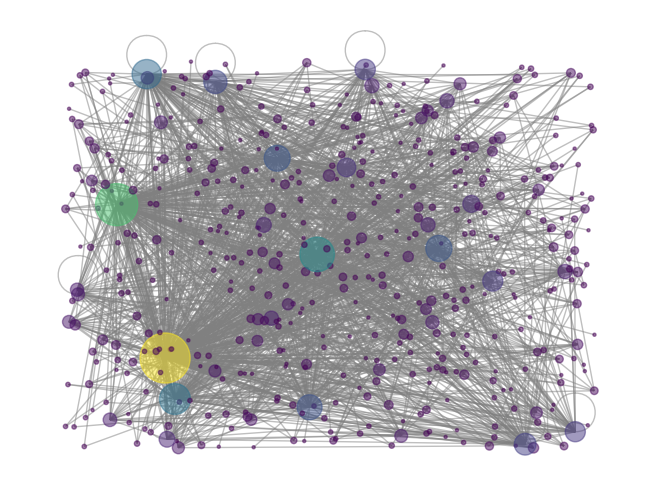

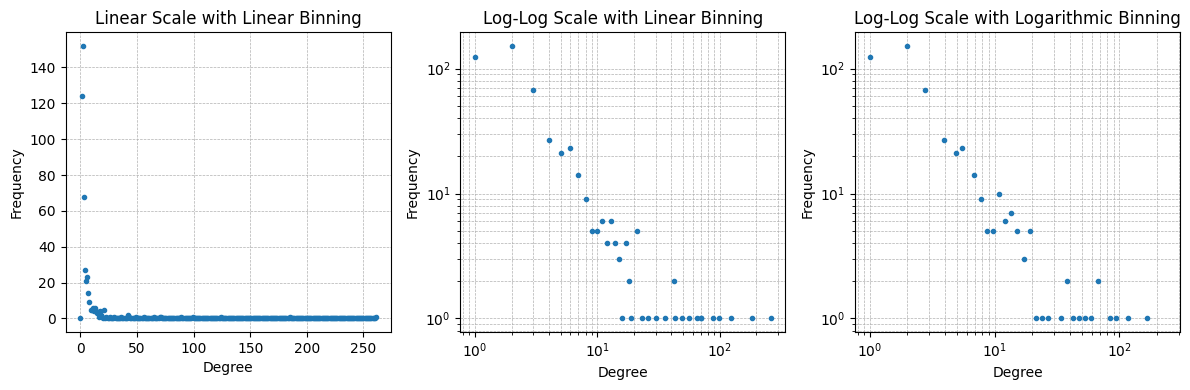

Mean Degree: 6.179640718562874
Standard Deviation of Degree: 17.786145471383062
network density = 0.012359281437125749
Average clustering coefficient = 0.4353429976154402
P values for an exponential distribution  (12747.999118534684, 1.692423492562191e-19)
P value for a streched exponential distribution (37.07940593235058, 0.0012699742870355888)


Assuming nested distributions


P value for a truncated powerlaw distribution (-0.8543740486628355, 0.19114787906048814)
P value for a Log Normal distribution (-1.2763967946236452, 0.40643043373224663)


<ipython-input-8-82a8508ba5ba>:121: RuntimeWarning: divide by zero encountered in log
  log_degrees2 = np.log(degrees2)


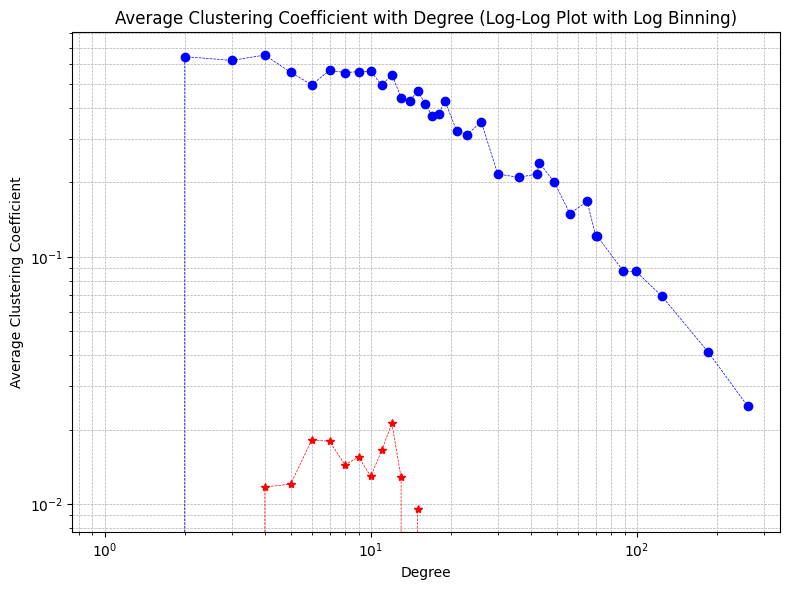

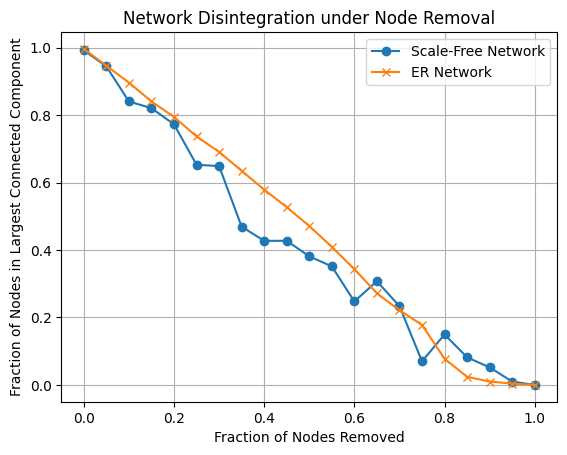

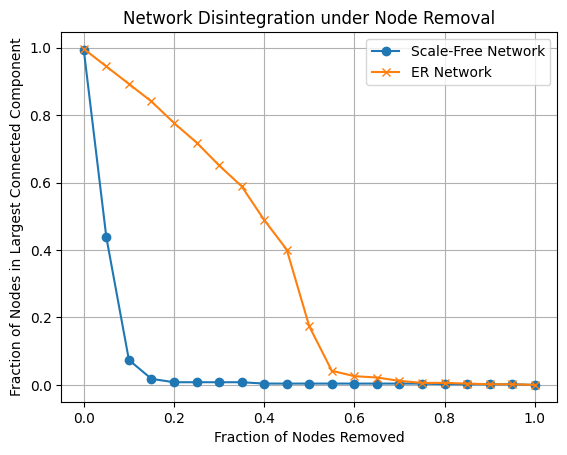

In [ ]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

theoretical_distribution = powerlaw.Power_Law(xmin=1, parameters=[1.9])
simulated_data = theoretical_distribution.generate_random(10000)
fit = powerlaw.Fit(simulated_data)
print("Gamma of powerlaw distribution is %0.2f" % fit.power_law.alpha)
n = 500  # Number of nodes
degree_sequence = [int(round(x)) for x in fit.power_law.generate_random(n)]
if sum(degree_sequence) % 2 != 0:
    n += 1  # Increase the number of nodes by 1 if the sum of degrees is odd
    degree_sequence = [int(round(x)) for x in fit.power_law.generate_random(n)]
G1 = nx.configuration_model(degree_sequence)
G1 = nx.Graph(G1)

node_count = G1.order()
print(node_count)
link_count = len(G1.edges())
print(link_count)

degree=G1.degree()
degree_val=[v for k, v in degree]
node_size= [i*5 for i in degree_val]
pos = nx.random_layout(G1)
nx.draw(G1,pos,with_labels = False,alpha = 0.5, node_size =node_size , node_color= node_size, edge_color='grey')
plt.show()


degree_sequence = [d for n, d in G1.degree()]
degree_counts = np.bincount(degree_sequence)

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(degree_counts, marker='o', markersize=3, linestyle='None')
plt.title("Linear Scale with Linear Binning")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1,3,2)
plt.loglog(degree_counts, marker='o', markersize=3, linestyle='None')
plt.title("Log-Log Scale with Linear Binning")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.subplot(1,3,3)
hist, bins = np.histogram(degree_sequence, bins=np.logspace(0, np.log10(max(degree_sequence)), 50))
plt.loglog(bins[:-1], hist, marker='o', markersize=3, linestyle='None')
plt.title("Log-Log Scale with Logarithmic Binning")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()


Degree=G1.degree()
CC=nx.clustering(G1)
mean_degree = np.mean(degree_val)
print(f"Mean Degree: {mean_degree}")
std_degree = np.std(degree_val)
print(f"Standard Deviation of Degree: {std_degree}")

density = nx.density(G1)
print("network density =", density)
avg_clustering = nx.average_clustering(G1,weight='weight')
print("Average clustering coefficient =", avg_clustering)

plexp = fit.distribution_compare('power_law','exponential')
print("P values for an exponential distribution ", plexp)
plsexp = fit.distribution_compare('power_law','stretched_exponential')
print("P value for a streched exponential distribution", plsexp)
pltpl = fit.distribution_compare('power_law','truncated_power_law')
print("P value for a truncated powerlaw distribution", pltpl)
plln = fit.distribution_compare('power_law','lognormal')
print("P value for a Log Normal distribution", plln)



def edpr(n,m):
    tpe = math.comb(n,2)
    return m / tpe

p = edpr(n,link_count)
#Now doing this for ER graphs to compare:
G2 = nx.erdos_renyi_graph(n,p)
degree2 = G2.degree()
CC2=nx.clustering(G2)
degree_cc2 = {}
for node, deg in degree2:
    if deg not in degree_cc2:
        degree_cc2[deg] = []
    degree_cc2[deg].append(CC2[node])

# Calculate average clustering coefficient for each degree
degree_cc = {}
for node, deg in degree:
    if deg not in degree_cc:
        degree_cc[deg] = []
    degree_cc[deg].append(CC[node])

# Compute average clustering coefficient for each degree
avg_cc_degree = [(deg, np.mean(cc_list)) for deg, cc_list in degree_cc.items()]
avg_cc2 = [(deg, np.mean(cc_list)) for deg, cc_list in degree_cc2.items()]

# Sort by degree for plotting
avg_cc_degree.sort(key=lambda x: x[0])
avg_cc2.sort(key=lambda x: x[0])

# Extract degree and corresponding average clustering coefficient values
degrees, avg_cc_values = zip(*avg_cc_degree)
degrees2, avg_cc2_val = zip(*avg_cc2)

# Log binning
log_degrees = np.log(degrees)
log_degrees2 = np.log(degrees2)

plt.figure(figsize=(8,6))
plt.loglog(degrees, avg_cc_values, marker='o', linestyle='--', linewidth= '0.5', color='b', label='Power Law with BA model')
plt.loglog(degrees2, avg_cc2_val, marker='*', linestyle='--', linewidth= '0.5', color='r', label='ER Graph expectation')
plt.title('Average Clustering Coefficient with Degree (Log-Log Plot with Log Binning)')
plt.xlabel('Degree')
plt.ylabel('Average Clustering Coefficient')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


def remove_nodes(G, fraction, strategy='random'):
    if strategy == 'random':
        nodes_to_remove = np.random.choice(G.nodes, size=int(fraction * len(G)), replace=False)
    elif strategy == 'targeted':
        centrality = dict(nx.degree(G))
        nodes_sorted = sorted(centrality, key=centrality.get, reverse=True)
        nodes_to_remove = nodes_sorted[:int(fraction * len(G))]
    else:
        raise ValueError("Invalid removal strategy. Choose 'random' or 'targeted'.")

    G_remain = G.copy()
    G_remain.remove_nodes_from(nodes_to_remove)

    # Calculate the size of the largest connected component
    lcc_sizes = [len(c) for c in sorted(nx.connected_components(G_remain), key=len, reverse=True)]

    return G_remain, lcc_sizes

def plot_disintegration(G, G_er, fraction_range, strategy='random'):
    lcc_sizes_sf = []
    lcc_sizes_er = []
    for fraction in fraction_range:
        G_sf_remain, lcc_sizes = remove_nodes(G, fraction, strategy)
        if len(lcc_sizes) > 0:  # Check if there are connected components remaining
            lcc_sizes_sf.append(max(lcc_sizes) / len(G))
        else:
            lcc_sizes_sf.append(0)

        G_er_remain, lcc_sizes_er_tmp = remove_nodes(G_er, fraction, strategy)
        if len(lcc_sizes_er_tmp) > 0:  # Check if there are connected components remaining
            lcc_sizes_er.append(max(lcc_sizes_er_tmp) / len(G_er))
        else:
            lcc_sizes_er.append(0)

    plt.plot(fraction_range, lcc_sizes_sf, label='Scale-Free Network', marker='o')
    plt.plot(fraction_range, lcc_sizes_er, label='ER Network', marker='x')
    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Fraction of Nodes in Largest Connected Component')
    plt.title('Network Disintegration under Node Removal')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the range of fractions to remove
fraction_range = np.linspace(0, 1, 21)

# Plot disintegration under random node removal
plot_disintegration(G1, G2, fraction_range, strategy='random')

# Plot disintegration under targeted node removal
plot_disintegration(G1, G2, fraction_range, strategy='targeted')
